In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualisation

In [2]:
data= pd.read_csv('train_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.shape

(891, 12)

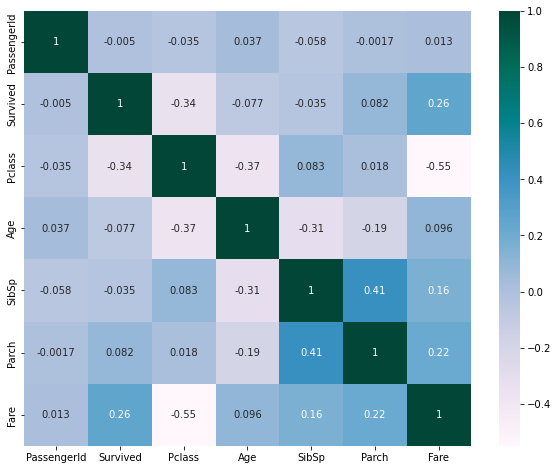

In [5]:
#correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="PuBuGn")
plt.show()

In [6]:
#Mean of survival by sex
data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending= False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

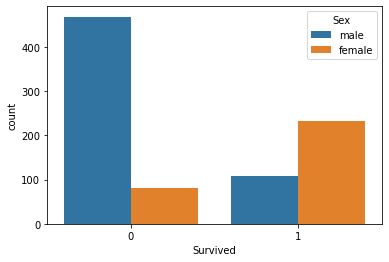

In [7]:
#Countplot of survival with respect to sex
sns.countplot(x='Survived', data= data, hue= 'Sex')

## Data Manipulation


## Checking for null values

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

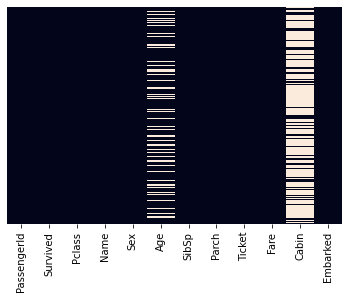

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [10]:
# % of null values of Age
(data['Age'].isna().sum()/ len(data['Age']))*100

19.865319865319865

In [11]:
# % of null values of Cabin
(data['Cabin'].isna().sum()/ len(data['Cabin']))*100

77.10437710437711

## Fill na values

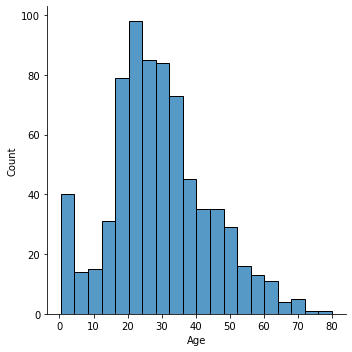

In [12]:
sns.displot(x='Age', data=data)

In [13]:
data['Age'].mean()

29.69911764705882

In [14]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [15]:
#verify the absence of null values
data['Age'].isna().sum()

0

<AxesSubplot:>

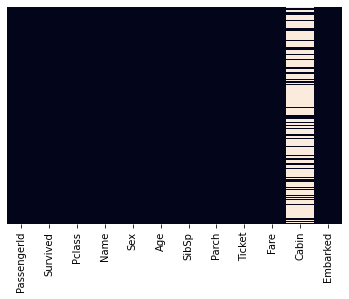

In [16]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

We see that the Age column is now free of null values. But Cabin column has a lot of null values and is not required or relevant for our prediction. Hence we drop it. 

In [17]:
#dropping Cabin column (axis=1 represents column dropping)
data.drop('Cabin', axis=1, inplace=True)

## Convert catergorical variables to numerical

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We can see Name, Sex, Ticket and Embarked are non numerical. But the variables Name, Ticket and Embarked are variables that are not relevant for our prediction hence we drop them. For now we convert only Sex to numerical values.

In [19]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
gender= pd.get_dummies(data['Sex'], drop_first=True)

In [21]:
data['Gender']=gender

In [22]:
data.drop(['Name', 'Ticket', 'Embarked', 'Sex'], axis=1, inplace=True)

In [23]:
#data.pop('Survived')
#data.insert(0, 'Survived', first_column)

data=data.iloc[:,[1,0,2,3,4,5,6,7]]

In [24]:
#Our final cleaned data for prediction
data

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,1,3,22.000000,1,0,7.2500,1
1,1,2,1,38.000000,1,0,71.2833,0
2,1,3,3,26.000000,0,0,7.9250,0
3,1,4,1,35.000000,1,0,53.1000,0
4,0,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,887,2,27.000000,0,0,13.0000,1
887,1,888,1,19.000000,0,0,30.0000,0
888,0,889,3,29.699118,1,2,23.4500,0
889,1,890,1,26.000000,0,0,30.0000,1


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Gender       891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


In [25]:
#####data['Age'].value_counts(dropna=False)--- only useful when our variable has only a few actegories

In [26]:
#Seperating Dependent and Independent variables
x=data.iloc[:,1:8]
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [27]:
#y=data.iloc[:,0]
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Data Modelling

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [30]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [31]:
#Fit logistic regression model
logistic_model= LogisticRegression()

In [32]:
logistic_model.fit(x_train, y_train)

C:\Users\iqfat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#prediction
predict=logistic_model.predict(x_test)

## Testing performance

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
#print confusion matrix
confusion_matrix(y_test, predict)

array([[151,  24],
       [ 38,  82]], dtype=int64)

In [36]:
#confusion matrix in the form of Data Frame
pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,38,82


In [37]:
#to check the accuarcy we import the classification report
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.77      0.68      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.77      0.78       295
weighted avg       0.79      0.79      0.79       295



We see that the precision of prediction of the model is **79%**

In [39]:
#or we could calculate the accuracy score
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, predict)

0.7898305084745763

## Cleaning test data

In [41]:
test= pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [43]:
test.shape

(418, 11)

In [44]:
#missing data in the test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
pd.get_dummies(test['Sex'])


,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [46]:
gender= pd.get_dummies(test['Sex'], drop_first=True)
test['Gender']=gender
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [47]:
#dropping irrelevant variables
test.drop(['Name', 'Ticket', 'Embarked', 'Sex', 'Cabin'], axis=1, inplace=True)

In [48]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [49]:
#filling null values in Age column
test['Age'].mean()

30.272590361445783

In [50]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [51]:
#Fare column has the most frequent value of 7.75
test['Fare'].mode()

0    7.75
Name: Fare, dtype: float64

In [52]:
#filling Fare column with mean
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Gender       418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 20.1 KB


## Applying model to test data

In [67]:
Xtrain= data.iloc[:,1:8]
Ytrain=data['Survived']

In [69]:
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression()

In [70]:
logistic_model.fit(Xtrain, Ytrain)

C:\Users\iqfat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
Xtest=test
Xtest.shape

(418, 7)

In [86]:
Y_pred= logistic_model.predict(Xtest)
Y_pred

(418,)

In [89]:
#Final DataFrame
final=pd.DataFrame(test['PassengerId'])
final['Survived']=Y_pred
final.to_csv("predictions.csv", index=False)